# 1. Install Dependencies and Setup

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in the extension list.')
                os.remove(image_path)
        except Exception as e:
            print('issues with image {}'.format(image_path))

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

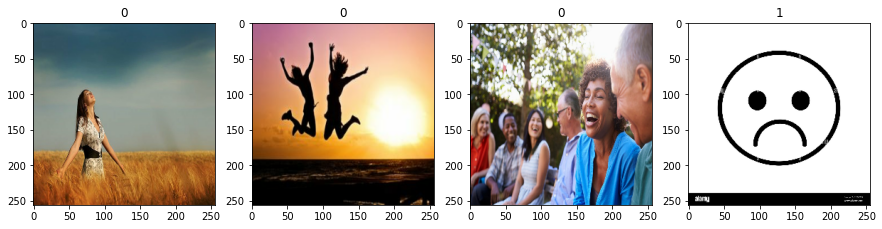

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y : (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.5372549 , 0.654902  , 0.75686276],
          [0.5372549 , 0.654902  , 0.75686276],
          [0.5372549 , 0.654902  , 0.75686276],
          ...,
          [0.44804305, 0.27026272, 0.15425092],
          [0.49019608, 0.29607844, 0.1627451 ],
          [0.53464305, 0.32679993, 0.16601562]],
 
         [[0.53920805, 0.6568551 , 0.7588159 ],
          [0.53920805, 0.6568551 , 0.7588159 ],
          [0.53920805, 0.6568551 , 0.7588159 ],
          ...,
          [0.4284352 , 0.26176855, 0.1539254 ],
          [0.48824295, 0.29412532, 0.16079198],
          [0.527451  , 0.31960785, 0.15882353]],
 
         [[0.5411765 , 0.65882355, 0.7607843 ],
          [0.5411765 , 0.65882355, 0.7607843 ],
          [0.5411765 , 0.65882355, 0.7607843 ],
          ...,
          [0.40066636, 0.24901961, 0.14705883],
          [0.47517616, 0.28105852, 0.14772518],
          [0.5235294 , 0.3156863 , 0.15490197]],
 
         ...,
 
         [[0.28427544, 0.2764323 , 0.29604015],
          [0.27613

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
print(f'training data size (no. of batches) : {train_size}')
print(f'validation data size (no. of batches): {val_size}')
print(f'testing data size (no. of batches): {test_size}')

training data size (no. of batches) : 7
validation data size (no. of batches): 2
testing data size (no. of batches): 1


In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Building the Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Training the Model

In [24]:
logdir = 'logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 2s/step - loss: 1.0384 - accuracy: 0.4866 - val_loss: 0.6643 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 13s 2s/step - loss: 0.6823 - accuracy: 0.4777 - val_loss: 0.6797 - val_accuracy: 0.4375
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.6474 - accuracy: 0.5223 - val_loss: 0.6165 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 0.6022 - accuracy: 0.6875 - val_loss: 0.6157 - val_accuracy: 0.5781
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.5293 - accuracy: 0.7723 - val_loss: 0.4531 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.4312 - accuracy: 0.8259 - val_loss: 0.3666 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 0.3791 - accuracy: 0.8571 - val_loss: 0.2926 - val_accuracy: 0.8594
Epoch 8/20
7/7 [==================

In [28]:
hist.history

{'loss': [1.03835129737854,
  0.682332456111908,
  0.6474208235740662,
  0.6021652817726135,
  0.529272735118866,
  0.4312238395214081,
  0.37905216217041016,
  0.3039470613002777,
  0.2516893446445465,
  0.23863008618354797,
  0.1560095250606537,
  0.11622592061758041,
  0.12476597726345062,
  0.07832641899585724,
  0.060563378036022186,
  0.053254134953022,
  0.05988995358347893,
  0.03455635532736778,
  0.03635379299521446,
  0.02457054890692234],
 'accuracy': [0.4866071343421936,
  0.4776785671710968,
  0.5223214030265808,
  0.6875,
  0.7723214030265808,
  0.8258928656578064,
  0.8571428656578064,
  0.8928571343421936,
  0.9285714030265808,
  0.9285714030265808,
  0.96875,
  0.9821428656578064,
  0.96875,
  0.9866071343421936,
  0.9910714030265808,
  0.9866071343421936,
  0.9866071343421936,
  1.0,
  0.9955357313156128,
  0.9910714030265808],
 'val_loss': [0.6642522811889648,
  0.6797442436218262,
  0.6165262460708618,
  0.6157233119010925,
  0.45306092500686646,
  0.36658912897109

# 8. Evaluate Performance

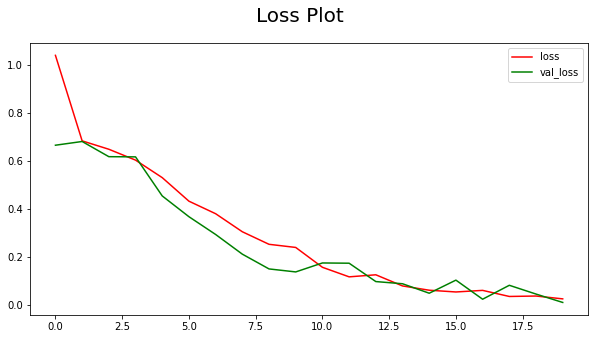

In [33]:
fig = plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'green', label = 'val_loss')
fig.suptitle('Loss Plot', fontsize=20)
plt.legend(loc='upper right')
plt.show()

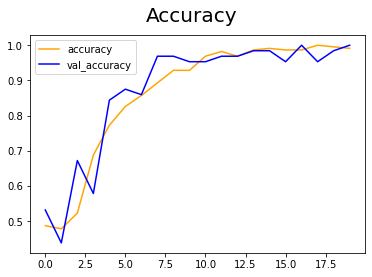

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluating on the Test Partition 

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 230ms/step


In [50]:
print(f'Precision : {pre.result()} Recall : {re.result()} Accuracy : {acc.result()}')

Precision : 1.0 Recall : 1.0 Accuracy : 1.0


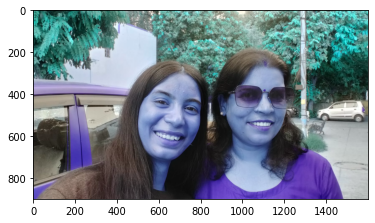

In [79]:
img = cv2.imread('test1.jpeg')
plt.imshow(img)
plt.show( )

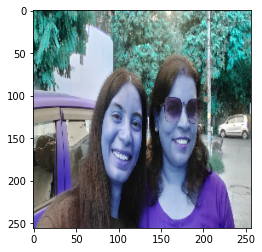

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
yhat1 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [82]:
yhat1

array([[0.18875518]], dtype=float32)

In [83]:
if yhat1 > 0.5: 
    print(f'Predicted class is Sad.')
else:
    print(f'Predicted class is Happy.')

Predicted class is Happy.


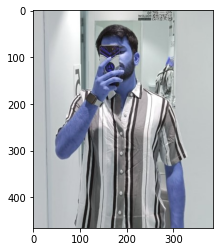

In [84]:
img = cv2.imread('test2.jpeg')
plt.imshow(img)
plt.show( )

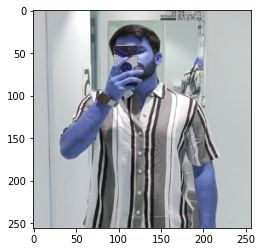

In [85]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [87]:
yhat2

array([[0.7093568]], dtype=float32)

In [88]:
if yhat2 > 0.5: 
    print(f'Predicted class is Sad.')
else:
    print(f'Predicted class is Happy.')

Predicted class is Sad.


# 10. Saving the Model

In [89]:
from tensorflow.keras.models import load_model

In [90]:
model.save(os.path.join('models', 'happy_sad_model.h5'))

In [94]:
newly_loaded_model = load_model(os.path.join('models', 'happy_sad_model.h5'))

In [96]:
newly_loaded_model